# Investigating a Movie Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csv=pd.read_csv(r"C:\Users\ASPIRE 5\Documents\tmdb-movies.csv")
csv.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [3]:
#made a copy ofth eoriginal csv file, just incase
movie=csv.copy()
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# DATA CLEANING

In [4]:
# checking for the totalmumber of empty rows in each column
movie.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

removing the id,imdb_id,homepage,tagline,keywords,production_ companies

In [5]:
#dropping the id,imdb_id,homepage,tagline,keywords,production_ companies which have a lot of empty columns and others being irrelevant

movie=movie.drop(['id','imdb_id','homepage','tagline','keywords','production_companies'],axis=1)
movie.head(4)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [6]:
#checking to see if they were dropped
movie.isna().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [29]:
#here i decided to drop just the empty categorical rows in their respective relevant categorical columns 
movie=movie.dropna(subset=['cast','director','genres','overview'])
movie.isna().sum()

budget            0
popularity        0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [30]:
#replacing excess white-spacces in column names to their normal syntax 
movie=movie.replace(' ','')
movie.head(4)

,budget,popularity,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000.0,32.985763,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000.0,28.419936,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,110000000.0,13.112507,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,200000000.0,11.173104,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [31]:
#checking to see if zeros are present in the runtime column
r=movie[movie['runtime']==0]
r.sum().any()

True

In [32]:
movie['runtime'].mode()

0    90
dtype: int64

In [33]:
#turning the zero values in the runtime column to empty columns so they can be filled with its mean value as 

e=movie['runtime'].mask(movie['runtime']==0).fillna(movie['runtime'].mean())
e

0        124.0
1        120.0
2        119.0
3        136.0
4        137.0
         ...  
10861     95.0
10862    176.0
10863     94.0
10864     80.0
10865     74.0
Name: runtime, Length: 10730, dtype: float64

filling the rows with 0 values

In [34]:
(movie==0).sum()

budget               0
popularity           0
revenue           5886
original_title       0
cast                 0
director             0
overview             0
runtime             27
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj        5576
revenue_adj       5886
dtype: int64

In [13]:
#mean of budget
np.mean(movie['budget'])

14807821.693569431

In [14]:
#old mode & mean values = 0 respectib=vely, therefore it can't be used to fill the empty rows
(movie['budget']).mode()

0    0
dtype: int64

In [15]:
#current median value = 0, therefore it can't be used to fill the empty rows
(movie['budget']).median()


0.0

In [35]:
#converting the 0 value rows to empty rows so they can be filled.

movie['Budget']=movie['budget'].mask(movie['budget']==0)
movie=movie.drop('budget',axis=1)
movie.head(5)


,popularity,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Budget
0,32.985763,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,150000000.0
1,28.419936,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,150000000.0
2,13.112507,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,110000000.0
3,11.173104,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,200000000.0
4,9.335014,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,190000000.0


In [36]:
#reindexing the position of the budget column to view the changes

mov=movie.pop('Budget')
n=movie.insert(0,'budget',mov)
movie.head(4)

,budget,popularity,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000.0,32.985763,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000.0,28.419936,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,110000000.0,13.112507,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,200000000.0,11.173104,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [37]:
#checking to see if the 0 rows have been converted
movie.isna().sum()

budget            0
popularity        0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [19]:
#now we fill the budget column with its mean value,onl because the mode and mean values were 0.

movie=movie.fillna(movie['budget'].mean())
movie.isna().sum()

budget            0
popularity        0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [38]:
#checking to see individual column statistics
movie.describe()


,budget,popularity,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1.073000e+04,10730.000000,1.073000e+04,10730.000000,10730.000000,10730.000000,10730.000000,1.073000e+04,1.073000e+04
mean,3.082808e+07,0.652688,4.032374e+07,102.477633,219.840913,5.964809,2001.258621,1.776975e+07,5.201117e+07
std,2.697832e+07,1.004834,1.176572e+08,30.479401,578.836513,0.930264,12.820336,3.446726e+07,1.454310e+08
min,1.000000e+00,0.000188,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,1.900000e+07,0.210766,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,3.082808e+07,0.387247,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,3.082808e+07,0.721158,2.500000e+07,112.000000,148.000000,6.600000,2011.000000,2.112691e+07,3.470565e+07
max,4.250000e+08,32.985763,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# how does a high or low budget affect the popularity of a movie?


In [21]:
#checking to see how non categorical columns are correleated
movie.corr()

,budget,popularity,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
budget,1.000000,0.439750,0.658209,0.136736,0.547692,0.061076,0.137460,0.809495,0.525462
popularity,0.439750,1.000000,0.662833,0.138205,0.800613,0.217847,0.093104,0.512074,0.608371
revenue,0.658209,0.662833,1.000000,0.164264,0.790885,0.178452,0.059102,0.705923,0.918989
runtime,0.136736,0.138205,0.164264,1.000000,0.164947,0.177145,-0.119130,0.222588,0.177388
vote_count,0.547692,0.800613,0.790885,0.164947,1.000000,0.260520,0.110360,0.586274,0.707511
vote_average,0.061076,0.217847,0.178452,0.177145,0.260520,1.000000,-0.127670,0.099795,0.199393
release_year,0.137460,0.093104,0.059102,-0.119130,0.110360,-0.127670,1.000000,0.019475,-0.064924
budget_adj,0.809495,0.512074,0.705923,0.222588,0.586274,0.099795,0.019475,1.000000,0.645907
revenue_adj,0.525462,0.608371,0.918989,0.177388,0.707511,0.199393,-0.064924,0.645907,1.000000


In [22]:
movie['budget'].median()

30828080.475746993

In [23]:
#extracting the popularity & budget columns for analysis
BvsP=movie[['popularity','budget','original_title']].head(10)
BvsP

,popularity,budget,original_title
0,32.985763,150000000.0,Jurassic World
1,28.419936,150000000.0,Mad Max: Fury Road
2,13.112507,110000000.0,Insurgent
3,11.173104,200000000.0,Star Wars: The Force Awakens
4,9.335014,190000000.0,Furious 7
5,9.110700,135000000.0,The Revenant
6,8.654359,155000000.0,Terminator Genisys
7,7.667400,108000000.0,The Martian
8,7.404165,74000000.0,Minions
9,6.326804,175000000.0,Inside Out


In [24]:
#confirming to see if they have empty rows
BvsP.isna().sum()

popularity        0
budget            0
original_title    0
dtype: int64

In [25]:
#checking to see how many times the max revenue was spent.
v=(BvsP['budget']==max(BvsP['budget']))
v.sum()

1

In [26]:
movie.corr()

,budget,popularity,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
budget,1.000000,0.439750,0.658209,0.136736,0.547692,0.061076,0.137460,0.809495,0.525462
popularity,0.439750,1.000000,0.662833,0.138205,0.800613,0.217847,0.093104,0.512074,0.608371
revenue,0.658209,0.662833,1.000000,0.164264,0.790885,0.178452,0.059102,0.705923,0.918989
runtime,0.136736,0.138205,0.164264,1.000000,0.164947,0.177145,-0.119130,0.222588,0.177388
vote_count,0.547692,0.800613,0.790885,0.164947,1.000000,0.260520,0.110360,0.586274,0.707511
vote_average,0.061076,0.217847,0.178452,0.177145,0.260520,1.000000,-0.127670,0.099795,0.199393
release_year,0.137460,0.093104,0.059102,-0.119130,0.110360,-0.127670,1.000000,0.019475,-0.064924
budget_adj,0.809495,0.512074,0.705923,0.222588,0.586274,0.099795,0.019475,1.000000,0.645907
revenue_adj,0.525462,0.608371,0.918989,0.177388,0.707511,0.199393,-0.064924,0.645907,1.000000


In [39]:
#now we fill the budget column with its mean value
movie=movie.fillna(movie['budget'].mean())
movie.isna().sum()

budget            0
popularity        0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [40]:
#showing how much budget was spent on the 10 most popular movies

c=BvsP.head(10)
print(c)

   popularity       budget                original_title
0   32.985763  150000000.0                Jurassic World
1   28.419936  150000000.0            Mad Max: Fury Road
2   13.112507  110000000.0                     Insurgent
3   11.173104  200000000.0  Star Wars: The Force Awakens
4    9.335014  190000000.0                     Furious 7
5    9.110700  135000000.0                  The Revenant
6    8.654359  155000000.0            Terminator Genisys
7    7.667400  108000000.0                   The Martian
8    7.404165   74000000.0                       Minions
9    6.326804  175000000.0                    Inside Out


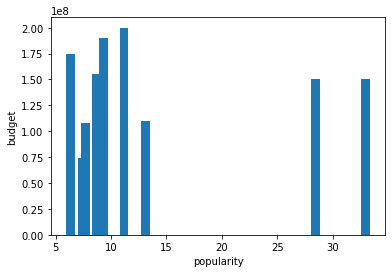

In [41]:
import matplotlib.pyplot as plt
plt.bar(BvsP['popularity'],BvsP['budget'])
plt.xlabel('popularity')
plt.ylabel('budget')
plt.show()

In [42]:
#printing out the row containing the max revenue & its corrresponding values in popularity & budget to prove the point
max_budget=movie[['popularity','budget','revenue']].loc[movie['budget'].idxmax()]
max_budget

popularity    2.505400e-01
budget        4.250000e+08
revenue       1.108757e+07
Name: 2244, dtype: float64

In [ ]:
#here i was trying to see the budget 
nn=(movie['budget']>=110000000) & (movie['budget']<=200000000)
values_within_range=(movie['budget'].loc[nn])

#x displays total number of budget values present ranging between the budget of the top 5 movies with the highest popularity
x=len(values_within_range)

#total length of values in the budget column
l=len(movie['budget'])

#finding the percentage of this range of values present in the budget column.
total_perc_present_in_col=(x/l)*100

#2.22% is the percentage represented by the range over the entire column
total_perc_present_in_col

from my findings,the 5 most popular movies had a budget ranging between 110000000 and 200000000, both values having a budget value above our median budget value of 30828080 ....so in most cases,  yes! the higher the budget the better the rating although this rule doesn't apply to the max of the budget being  425000000. Other factors(columns) also affect the Budget(VS)Popularity correleation too as seen earlier. 

# Do popular movies generate more REVENUE?

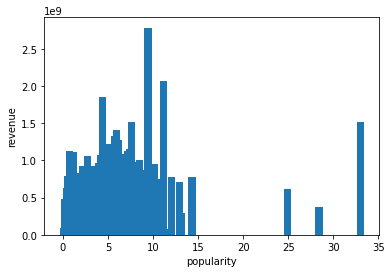

In [43]:
#establishing and viewing a relationship between revenue, popularity and movie_title columns.

PvsR=movie[['popularity','revenue','original_title']]
plt.bar(movie['popularity'],movie['revenue'])
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.show()

In [44]:
#printing the top 10 most popular movies with their respective revenues
PvsR.head(10)


,popularity,revenue,original_title
0,32.985763,1513528810,Jurassic World
1,28.419936,378436354,Mad Max: Fury Road
2,13.112507,295238201,Insurgent
3,11.173104,2068178225,Star Wars: The Force Awakens
4,9.335014,1506249360,Furious 7
5,9.110700,532950503,The Revenant
6,8.654359,440603537,Terminator Genisys
7,7.667400,595380321,The Martian
8,7.404165,1156730962,Minions
9,6.326804,853708609,Inside Out


In [45]:
PvsR.describe()

,popularity,revenue
count,10730.000000,1.073000e+04
mean,0.652688,4.032374e+07
std,1.004834,1.176572e+08
min,0.000188,0.000000e+00
25%,0.210766,0.000000e+00
50%,0.387247,0.000000e+00
75%,0.721158,2.500000e+07
max,32.985763,2.781506e+09


In [46]:
#checking for empty rows
PvsR['revenue'].isna().sum()

0

In [47]:
#checking the max revenue
max(PvsR['revenue'])

2781505847

In [48]:
#checking the no of 0 values present in the revenue column 
dw=PvsR['revenue']==0
dw.sum()

5886

In [49]:
#converting the rows with 0 to NaN values and filling it up with their mean value as their mode and median values were 0. Also ensuring all rows were filled
movie['revenue']=movie['revenue'].mask(PvsR['revenue']==0)
movie.isna().sum()
movie['revenue']=movie['revenue'].fillna(movie['revenue'].mean())
movie.isna().sum()



budget            0
popularity        0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [50]:
PvsR['revenue'].describe()

count    1.073000e+04
mean     4.032374e+07
std      1.176572e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.500000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [51]:
max_revenue=movie[['popularity','original_title','revenue']].loc[movie['revenue'].idxmax()]
max_revenue

popularity            9.432768
original_title          Avatar
revenue           2781505847.0
Name: 1386, dtype: object

In [52]:
#sorting values by revenue to see the top  
gg=PvsR[['revenue','original_title','popularity']].head(10)
gg=gg.sort_values(by='revenue',ascending=False)
gg

,revenue,original_title,popularity
3,2068178225,Star Wars: The Force Awakens,11.173104
0,1513528810,Jurassic World,32.985763
4,1506249360,Furious 7,9.335014
8,1156730962,Minions,7.404165
9,853708609,Inside Out,6.326804
7,595380321,The Martian,7.667400
5,532950503,The Revenant,9.110700
6,440603537,Terminator Genisys,8.654359
1,378436354,Mad Max: Fury Road,28.419936
2,295238201,Insurgent,13.112507


from analysis, after replacing the '0' in the revenue column with the mean value, i can conclude that the popularity of a movie somehow depends on how much revenue is generated.Star Wars: The Force Awakens generated more revenue with others having a revenue amount greater than median & mean values respectively.Though, the max revenue generated, belongs to the movie title, Avatar it also has a popularity of  9.432768, a value belonging to the range of top 10 movies by popularity

In [53]:
movie.corr()

,budget,popularity,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
budget,1.000000,0.439750,0.640893,0.136736,0.547692,0.061076,0.137460,0.809495,0.525462
popularity,0.439750,1.000000,0.570910,0.138205,0.800613,0.217847,0.093104,0.512074,0.608371
revenue,0.640893,0.570910,1.000000,0.110749,0.715486,0.119510,0.073715,0.575208,0.831680
runtime,0.136736,0.138205,0.110749,1.000000,0.164947,0.177145,-0.119130,0.222588,0.177388
vote_count,0.547692,0.800613,0.715486,0.164947,1.000000,0.260520,0.110360,0.586274,0.707511
vote_average,0.061076,0.217847,0.119510,0.177145,0.260520,1.000000,-0.127670,0.099795,0.199393
release_year,0.137460,0.093104,0.073715,-0.119130,0.110360,-0.127670,1.000000,0.019475,-0.064924
budget_adj,0.809495,0.512074,0.575208,0.222588,0.586274,0.099795,0.019475,1.000000,0.645907
revenue_adj,0.525462,0.608371,0.831680,0.177388,0.707511,0.199393,-0.064924,0.645907,1.000000


# summary


After final analysis i can conclude that if a higher revenue is used to produce a movie there's a good chance that the movie will be successful. On the other hand the higher the budget the better the ratings.